In [341]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Below we are attempting to load the csv file that contains data on earthquakes in the United States from December 2015 to December 2018. We then print the head and tail of the dataset.

In [349]:
try:
    quake = pd.read_csv("linregdata2.csv")
    print("Yay: Earthquake data loaded")
except:
    print("Oops: Earthquake data unable to load")

Yay: Earthquake data loaded


We have over 9000 rows of data with 8 features: 
Year, Month, Day, Hour, Latitude, Longitude, Depth, and Magnitude

In [350]:
quake.shape

(9436, 8)

Shows the max, min, and mean of all of the earthquakes in this dataset


In [351]:
min = quake["mag"].min()
max = quake["mag"].max()
avg = quake["mag"].mean()
print("Minimum:", min)
print("Maximum:",max)
print("Mean",avg)

Minimum: 2.5
Maximum: 6.3
Mean 2.9046873675285863


Shows a graph with the number earthquakes per magnitude range

Text(0.5, 1.0, 'Magnitude vs Number of Occurences')

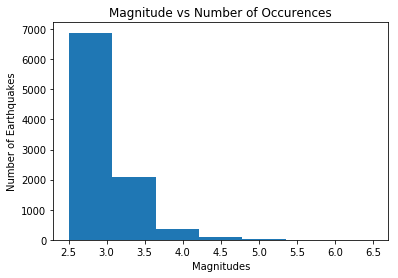

In [352]:
(n,bins, patches) = plt.hist(quake["mag"], range=(2.5,6.5), bins=7)
plt.xlabel("Magnitudes")
plt.ylabel("Number of Earthquakes")
plt.title("Magnitude vs Number of Occurences")

We wanted to group the earthquakes together by month to see which month had the most earthquakes or if any month in particular stood out.


In [353]:
month_rate = quake.groupby("month").groups
rate = []
for i in range(1,13):
    val = month_rate[i]
    rate.append(len(val))
    
print("Rate of occurence by month: \n", rate)
print("Total number of earthquakes: \n", sum(rate))

Rate of occurence by month: 
 [865, 794, 755, 754, 653, 653, 767, 708, 1314, 623, 639, 911]
Total number of earthquakes: 
 9436


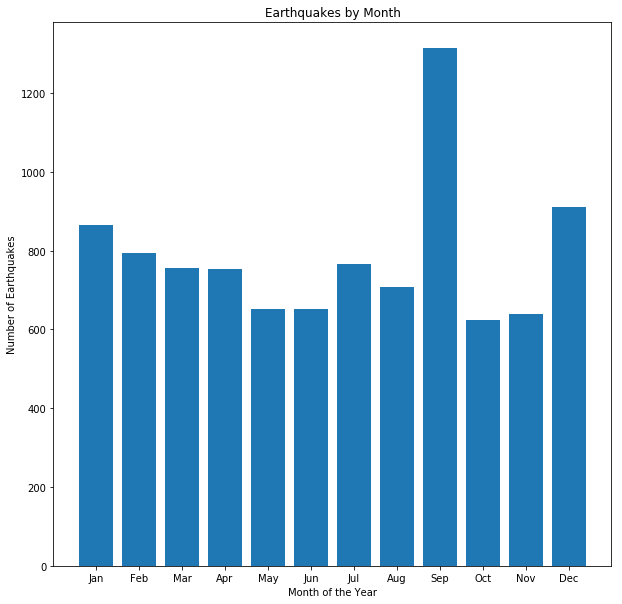

In [354]:
fig, ax = plt.subplots(figsize = (10,10))
bar_positions = np.arange(12)
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov", "Dec"]
bar_heights = rate
ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(0,12)
ax.set_xticks(tick_positions)
ax.set_xticklabels(months)
plt.title("Earthquakes by Month")
plt.xlabel("Month of the Year")
plt.ylabel("Number of Earthquakes")
plt.show()

We also wanted to group earthquakes together by hour of the day similar to the section above. 

In [355]:
hour_rate = quake.groupby("hour").groups
rate = []
for i in range(0,24):
    val = hour_rate[i]
    rate.append(len(val))
    
print(" Rate of occurence by hour: \n",rate)
print("Total number of earthquakes: \n", sum(rate))

 Rate of occurence by hour: 
 [403, 365, 341, 360, 359, 327, 409, 365, 423, 325, 335, 378, 372, 358, 359, 377, 398, 403, 384, 493, 555, 481, 451, 415]
Total number of earthquakes: 
 9436


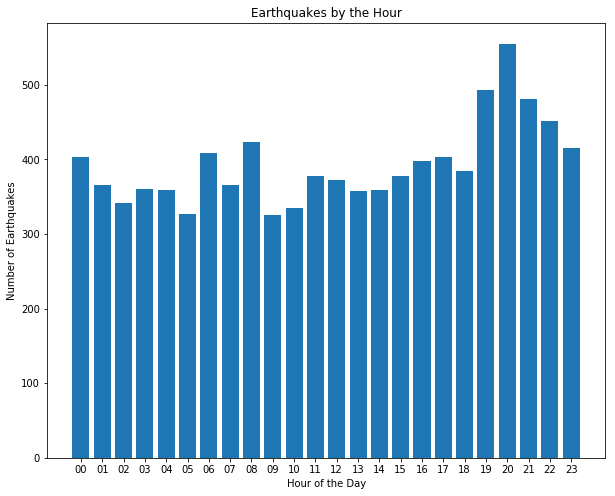

In [356]:
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(24)
hours = ["00","01","02","03","04","05","06","07","08","09","10","11", "12", "13", "14", "15","16","17","18","19","20","21","22","23"]
bar_heights = rate
ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(0,24)
ax.set_xticks(tick_positions)
ax.set_xticklabels(hours) 
plt.title("Earthquakes by the Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes")
plt.show()

In this section we created a scatter plot of depth vs magnitude so we could use Linear Regression on these two features


Text(0, 0.5, 'Magnitude')

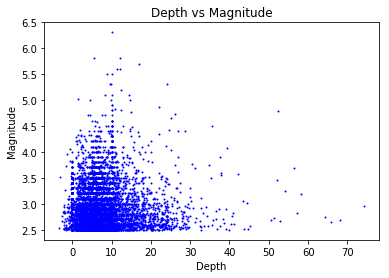

In [357]:
plt.scatter(quake["depth"],quake["mag"], s = 1, c = "blue")
plt.title("Depth vs Magnitude")
plt.xlabel("Depth")
plt.ylabel("Magnitude")

Performing Linear Regression using depth and magnitude as our key features. We hoped to find the relationship between the two features to find out if one had an effect on the other. We found no linear relationship between these two features and chose not to use depth in our next models. Such a low correlation coefficient shows the lack of linear relation.

In [358]:
X = quake['depth']
Y = quake['mag']
X1 = X.reshape(len(X),1)
Y1 = Y.reshape(len(Y),1)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
Y2 = regr.predict(X1)
m2err = np.mean((Y2 - Y1) ** 2)

print("Correlation Coefficient: ", regr.coef_)
print("Mean squared error: ", m2err)

Correlation Coefficient:  [[0.00013435]]
Mean squared error:  0.15794925051918515


Text(0.5, 1.0, 'Linear Regression of Magnitude vs Depth')

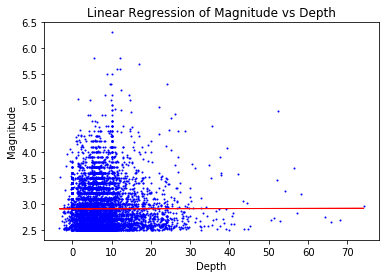

In [359]:
plt.scatter(X1, Y1, s = 1 ,c="blue")
plt.plot(X1, Y2, c = "red", linewidth = 1)
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.title("Linear Regression of Magnitude vs Depth")